In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pickle


In [2]:
#Create an enging to connect to a SQLlite database and pull in the data
disk_engine = create_engine('sqlite:///my_lite_store.db')
db_df = pd.read_sql_query('SELECT * FROM wave_data',disk_engine)
db_df.head()

,index,0,1,2,3,4,5,6,7,8,...,183,184,185,186,187,188,189,190,191,192
0,0,-75.095719,129.611846,-32.669898,15.285441,-2.378207,14.626390,-3.764634,17.962046,-2.011992,...,13.581584,15.363746,15.579746,35.387758,-0.004255,0.014481,-0.040944,0.001575,-0.005375,0.005263
1,1,-8.350567,113.704109,-19.147512,29.386994,-13.745963,7.170843,-12.804698,8.102789,-9.090141,...,17.756826,18.226822,16.085308,34.338946,0.003580,0.010518,-0.084111,-0.005364,0.002910,-0.001546
2,2,-115.225264,3.676715,-38.724517,-4.002133,-15.980845,-11.146253,1.778062,4.020408,-2.446081,...,14.026372,16.014877,17.438533,31.626253,0.001479,-0.004756,0.013443,0.027352,-0.009380,-0.004788
3,3,-211.840458,87.311125,-53.307992,10.788239,-46.073711,13.174044,20.365529,14.869042,0.525608,...,27.707668,21.865110,26.985700,42.099477,-0.000115,-0.036755,-0.126207,-0.032240,0.059965,-0.026851
4,4,-235.825635,132.952580,42.155849,18.454956,12.176050,11.412190,-1.725005,10.437025,-0.802941,...,16.328094,16.194166,16.016508,31.238708,-0.000755,0.010912,0.038104,-0.002897,-0.002296,-0.001802


In [3]:
#Pull in the train.csv data to create lables that will be used on the y axis
df2 = pd.read_csv("train.csv") 
labels = df2['Class']
catalog = df2['Class'].unique().tolist()
catalog = [i for i in enumerate(catalog)]
catalog

[(0, 'siren'),
 (1, 'street_music'),
 (2, 'drilling'),
 (3, 'dog_bark'),
 (4, 'children_playing'),
 (5, 'gun_shot'),
 (6, 'engine_idling'),
 (7, 'air_conditioner'),
 (8, 'jackhammer'),
 (9, 'car_horn')]

In [4]:
#Create X and Y for to model
X = db_df.values
y = labels.values.reshape(-1, 1)
print(X.shape, y.shape)

(5435, 194) (5435, 1)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
#model = SVC(kernel='linear')
#model.fit(X_train, y_train)
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
predictions = loaded_model.predict(X_test)
print(result)

0.7947019867549668


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,predictions)
confusion = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
confusion

array([[0.98507463, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00746269, 0.        , 0.00746269],
       [0.01162791, 0.91860465, 0.        , 0.        , 0.01162791,
        0.01162791, 0.        , 0.01162791, 0.        , 0.03488372],
       [0.00684932, 0.        , 0.94520548, 0.01369863, 0.        ,
        0.        , 0.        , 0.        , 0.00684932, 0.02739726],
       [0.01242236, 0.0310559 , 0.0621118 , 0.83850932, 0.00621118,
        0.00621118, 0.00621118, 0.        , 0.02484472, 0.01242236],
       [0.01360544, 0.00680272, 0.01360544, 0.00680272, 0.93877551,
        0.        , 0.        , 0.        , 0.00680272, 0.01360544],
       [0.02      , 0.        , 0.        , 0.        , 0.00666667,
        0.97333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01492537, 0.        , 0.07462687, 0.01492537,
        0.        , 0.89552239, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

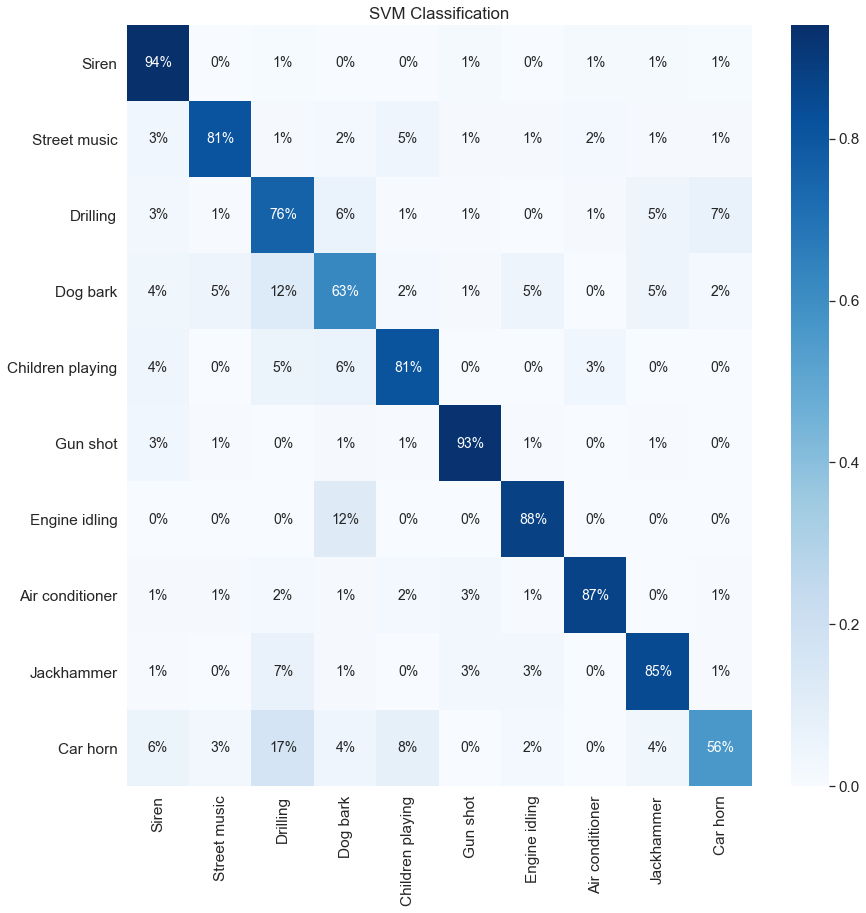

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion, index = [i[1].replace('_',' ').capitalize() for i in catalog],
                     columns  = [i[1].replace('_',' ').capitalize() for i in catalog])
sn.set(font_scale=1.4)
                     
plt.figure(figsize= (14,14))
plt.title('SVM Classification')
sn.heatmap(df_cm, annot = True,cmap = 'Blues',annot_kws={"size":14}, fmt ='.0%')
plt.savefig('heatmap.png')

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.25615235,  0.09577068, -2.24342141, ..., -0.80565122,
        -0.68081269, -1.2016843 ],
       [-0.59585227,  0.06660377, -2.29975692, ..., -0.75102852,
         0.15480878, -0.54675187],
       [ 0.39158294, -1.42189232,  1.52632725, ...,  0.45146095,
         0.11018965, -0.2108775 ],
       ...,
       [ 1.1037062 , -0.60935856,  0.37121701, ...,  0.45812541,
        -0.5231408 ,  0.19913228],
       [-1.18208232,  0.39927487,  0.09537103, ..., -0.21661331,
        -1.05811129, -0.63340221],
       [-1.16555088, -0.6517931 , -2.10554467, ..., -0.11020812,
         1.04374613, -0.24807202]])

In [14]:
#Establish Paramaters for gridsearch
param_grid = {'C': [1, 5, 10],
              'class_weight' : ['balanced'],
              'gamma': [0.0001, 0.001, 0.01],
             'kernel': ['rbf', 'poly']}
grid = GridSearchCV(loaded_model, param_grid, verbose=3)
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.4020542920029347, total=   4.7s
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.38614591009579957, total=   4.0s
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=rbf ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   12.5s remaining:    0.0s
C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.36504424778761063, total=   3.7s
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.11518708730741012, total=   3.6s
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.04863669859985262, total=   3.7s
[CV] C=1, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.04498525073746313, total=   3.8s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.677916360968452, total=   2.6s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.7030213706705969, total=   2.6s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.7013274336283186, total=   2.6s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=poly, score=0.15113719735876743, total=   3.6s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=poly, score=0.061164333087693444, total=   3.6s
[CV] C=1, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.001, kernel=poly, score=0.051622418879056046, total=   3.6s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.8466617754952311, total=   1.9s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.8282977155490051, total=   1.9s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.8613569321533924, total=   2.2s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=poly, score=0.6023477622890683, total=   3.1s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=poly, score=0.5799557848194546, total=   3.1s
[CV] C=1, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=1, class_weight=balanced, gamma=0.01, kernel=poly, score=0.5980825958702065, total=   3.6s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6316947909024211, total=   4.5s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6219602063375093, total=   5.0s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6283185840707964, total=   4.1s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.11665443873807776, total=   4.7s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.050110537951363304, total=   3.6s
[CV] C=5, class_weight=balanced, gamma=0.0001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.1172566371681416, total=   3.6s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.7835656639765224, total=   1.8s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.7862932940309506, total=   1.8s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.7964601769911505, total=   1.8s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=poly, score=0.16067498165810712, total=   3.5s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=poly, score=0.15991156963890935, total=   3.6s
[CV] C=5, class_weight=balanced, gamma=0.001, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.001, kernel=poly, score=0.14454277286135694, total=   3.5s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.9053558327219369, total=   1.6s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.8887251289609432, total=   1.6s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=rbf ..............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.9048672566371682, total=   1.6s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=poly, score=0.7754952311078503, total=   2.2s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=poly, score=0.7538688282977155, total=   2.1s
[CV] C=5, class_weight=balanced, gamma=0.01, kernel=poly .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=5, class_weight=balanced, gamma=0.01, kernel=poly, score=0.7684365781710915, total=   2.1s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=rbf ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6757153338224505, total=   2.5s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=rbf ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6845983787767134, total=   2.5s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=rbf ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, score=0.6917404129793511, total=   2.5s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=poly ..........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.13426265590608952, total=   3.6s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=poly ..........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.050110537951363304, total=   3.9s
[CV] C=10, class_weight=balanced, gamma=0.0001, kernel=poly ..........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.0001, kernel=poly, score=0.1172566371681416, total=   4.5s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.8136463683052091, total=   2.0s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.8061901252763449, total=   2.2s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=rbf ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=rbf, score=0.8119469026548672, total=   2.3s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=poly, score=0.16874541452677916, total=   5.2s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=poly, score=0.09137803979366249, total=   5.2s
[CV] C=10, class_weight=balanced, gamma=0.001, kernel=poly ...........


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.001, kernel=poly, score=0.16297935103244837, total=   4.9s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.9156272927366104, total=   2.1s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.9056742815033162, total=   1.9s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=rbf .............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=rbf, score=0.9092920353982301, total=   1.9s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.8283198826118855, total=   1.9s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.7995578481945468, total=   1.9s
[CV] C=10, class_weight=balanced, gamma=0.01, kernel=poly ............


C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  C=10, class_weight=balanced, gamma=0.01, kernel=poly, score=0.8134218289085545, total=   1.9s


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  4.2min finished
C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 5, 10], 'class_weight': ['balanced'], 'gamma': [0.0001, 0.001, 0.01], 'kernel': ['rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [40]:
#print best paramater combination and score
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.9102060843964671


In [41]:
best = SVC(C= 10, class_weight = 'balanced', gamma= 0.01, kernel='rbf')
best.fit(X_train_scaled,y_train)
tuned_result = best.score(X_test_scaled, y_test)
tuned_prediction = best.predict(X_test_scaled)
tuned_prediction
tuned_result

C:\Users\jcfis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9286239882266373

In [43]:
tuned_confusion = confusion_matrix(y_test,tuned_prediction)
tuned_confusion = tuned_confusion.astype('float') / tuned_confusion.sum(axis=1)[:, np.newaxis]
tuned_confusion

array([[0.98507463, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00746269, 0.        , 0.00746269],
       [0.01162791, 0.91860465, 0.        , 0.        , 0.01162791,
        0.01162791, 0.        , 0.01162791, 0.        , 0.03488372],
       [0.00684932, 0.        , 0.94520548, 0.01369863, 0.        ,
        0.        , 0.        , 0.        , 0.00684932, 0.02739726],
       [0.01242236, 0.0310559 , 0.0621118 , 0.83850932, 0.00621118,
        0.00621118, 0.00621118, 0.        , 0.02484472, 0.01242236],
       [0.01360544, 0.00680272, 0.01360544, 0.00680272, 0.93877551,
        0.        , 0.        , 0.        , 0.00680272, 0.01360544],
       [0.02      , 0.        , 0.        , 0.        , 0.00666667,
        0.97333333, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01492537, 0.        , 0.07462687, 0.01492537,
        0.        , 0.89552239, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

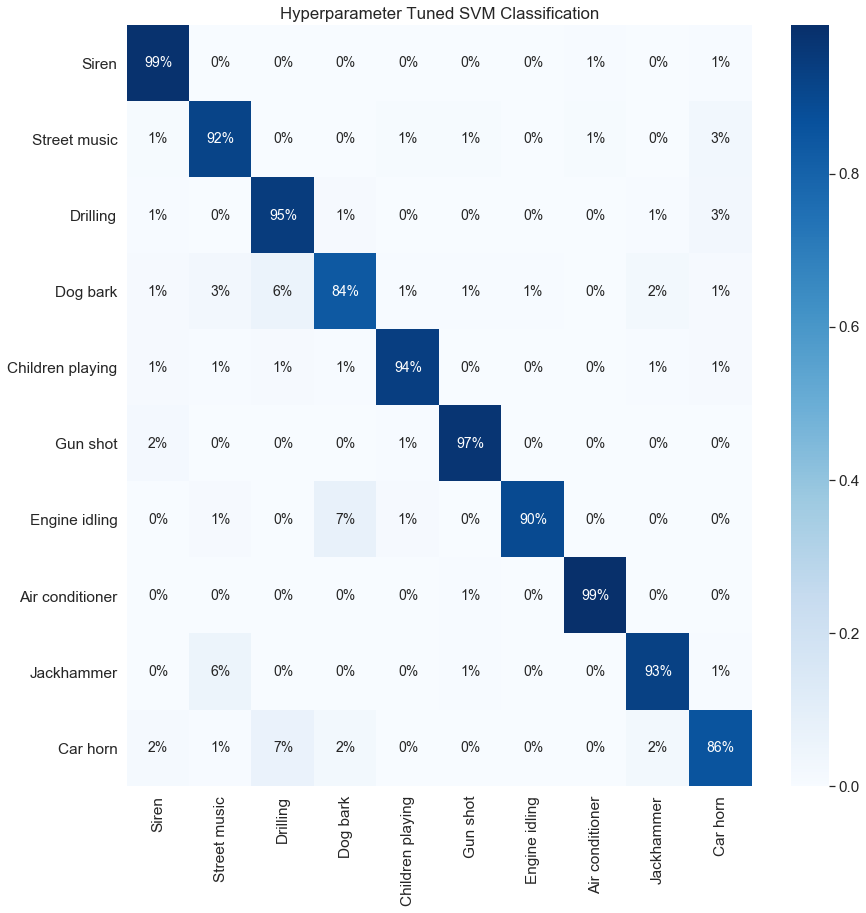

In [46]:
df_tuned_cm = pd.DataFrame(tuned_confusion, index = [i[1].replace('_',' ').capitalize() for i in catalog],
                     columns  = [i[1].replace('_',' ').capitalize() for i in catalog])
sn.set(font_scale=1.4)
                     
plt.figure(figsize= (14,14))
plt.title('Hyperparameter Tuned SVM Classification')
sn.heatmap(df_tuned_cm, annot = True,cmap = 'Blues',annot_kws={"size":14}, fmt ='.0%')
plt.savefig('Tuned_heatmap.png')